### Exercise 8: Random walk with drift

In [3]:
import random
import numpy as np
import scipy.stats as sts
import math
import matplotlib.pyplot as plt

The final position is 2


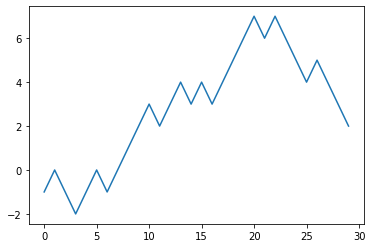

In [37]:
def flip(p):
    move = 0
    if random.random() < p:
        move = 1
    else:
        move = -1
    return move
number_of_step = 30
flips = []
position = 0
for i in range(number_of_step):
    position = position + flip(0.6)
    flips.append(position)
print("The final position is", flips[-1])
plt.plot(list(range(number_of_step)),flips)

[2, 8, 10, 8, 16, -12, 18, 12, 0, 6, 4, 8, 10, 0, 10, 2, 0, 8, 14, 0, 6, 4, 4, 2, 6, 12, 2, 6, 4, 10, 8, 0, 8, 2, 10, 6, 0, 18, 0, 6, 0, 4, 6, 6, 6, 6, 20, -6, 4, 12, 8, 14, 6, 6, 2, 4, 4, 4, 2, 8, 8, 10, 10, 6, -4, 10, 10, 6, 8, 4, 4, 10, 6, 14, 0, 10, 10, 12, 4, 16, -4, 0, 8, 14, -2, 8, 12, 2, 8, 4, 18, 4, 10, 8, 4, 6, 4, 10, 6, 10, -2, 8, 8, 0, 6, 14, 8, 6, 12, 6, 12, 2, 2, 10, 10, 4, 8, 6, 2, 8, 8, 14, 12, 10, 4, 10, 14, 10, 8, -10, 6, 2, 10, 6, 2, 12, 0, 6, 10, 2, 12, 6, 14, 12, 2, 10, 10, 12, 4, 0, 14, 16, -4, 10, 6, 4, 4, 2, 0, 4, 4, 2, 0, 8, 2, 16, 8, 10, 14, 4, 10, 12, 2, 2, 12, 8, -4, 8, 12, 6, 14, 0, 6, 10, 8, 4, 8, 10, 2, 4, 8, 4, 4, 6, 12, 12, 6, 6, 14, 10]


(array([ 2.,  1.,  4., 18., 21., 59., 58., 17., 16.,  4.]),
 array([-12. ,  -8.8,  -5.6,  -2.4,   0.8,   4. ,   7.2,  10.4,  13.6,
         16.8,  20. ]),
 <a list of 10 Patch objects>)

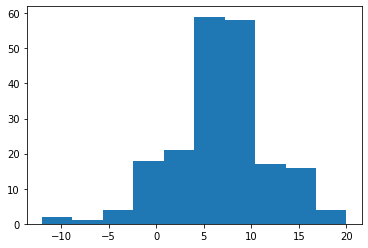

In [19]:
N = 200
final_position_list = []
for j in range(N):
    position = 0
    for i in range(number_of_step):
        position = position + flip(0.6)
    final_position_list.append(position)
print(final_position_list)
plt.hist(final_position_list)

In [20]:
print("The sample mean is", np.mean(final_position_list))

The sample mean is 6.63


In [23]:
print("The variance is", np.sum([(i-np.mean(final_position_list)) for i in final_position_list])/N)

The variance is 4.440892098500626e-16


### Exercise 9: Gambler’s ruin with time limits

In [38]:
def gambler_ruin(limit, gambler, house):
    gambler_fortunes = [gambler]
    while gambler_fortunes[-1] > 0 and gambler_fortunes[-1] < (gambler + house):
        if limit and len(gambler_fortunes) == limit:
            break
        w = random.choice([-1, 1])
        gambler_fortunes.append(gambler_fortunes[-1] + w)
    return gambler_fortunes


5266.689969604863 5577631.916039209


(array([21., 33., 37., 46., 48., 34., 32., 29., 25., 24.]),
 array([ 913. , 1820.8, 2728.6, 3636.4, 4544.2, 5452. , 6359.8, 7267.6,
        8175.4, 9083.2, 9991. ]),
 <a list of 10 Patch objects>)

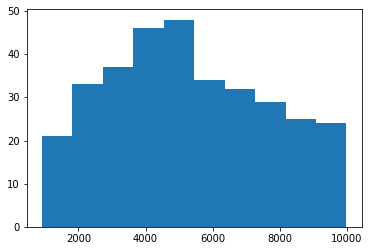

In [39]:
bankruptcy = []
for i in range(1000):
    arr = gambler_ruin(10000, 100, 200)
    if arr[-1] == 0:
        bankruptcy.append(len(arr))
print(np.mean(bankruptcy), np.var(bankruptcy))
plt.hist(bankruptcy)

16442.754977029097 277093514.1329193


(array([347., 150.,  79.,  31.,  14.,  19.,   7.,   2.,   1.,   3.]),
 array([   919. ,  11800.2,  22681.4,  33562.6,  44443.8,  55325. ,
         66206.2,  77087.4,  87968.6,  98849.8, 109731. ]),
 <a list of 10 Patch objects>)

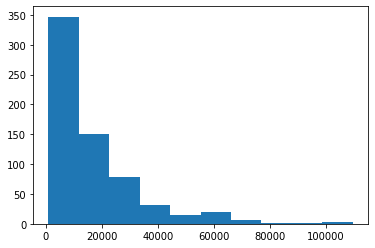

In [40]:
bankruptcy = []
for i in range(1000):
    arr = gambler_ruin(None, 100, 200)
    if arr[-1] == 0:
        bankruptcy.append(len(arr))

print(np.mean(bankruptcy), np.var(bankruptcy))
plt.hist(bankruptcy)